In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'pickup_hour', 'pickup_day_of_month',
                          'tip_amount', 
                          'fare_amount',
                          'pickup_latitude', 'pickup_longitude'
                         ])

df.head()

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,6.0,1.0,15,25
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,5.5,3.0,15,25
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,15.0,2.0,9,25
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,14.0,2.9,6,25
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,12.0,2.0,10,25


# How do times and fares vary by trips?
### BEN NOTE From the point of view of the driver - How much does the driver receive for each trip?

In [4]:
# fare_amount - fare accrued on meter (depends on distance or time)
# surcharge	- goes to driver? (paid by customer)
# mta_tax - goes to state (paid by customer)
# tip_amount - goes to driver (paid by customer)
# tolls_amount - goes to state (paid by customer)
# total_amount

In [5]:
df.describe()

,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month
count,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07
mean,-7.397544e+01,4.075065e+01,1.235947e+01,1.415978e+00,1.345986e+01,1.501326e+01
std,3.378817e-02,2.680608e-02,9.523436e+00,2.169195e+00,6.578274e+00,8.546484e+00
min,-7.429939e+01,4.047618e+01,2.500000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,-7.399223e+01,4.073577e+01,6.500000e+00,0.000000e+00,9.000000e+00,8.000000e+00
50%,-7.398203e+01,4.075316e+01,9.500000e+00,1.000000e+00,1.400000e+01,1.500000e+01
75%,-7.396791e+01,4.076781e+01,1.450000e+01,2.000000e+00,1.900000e+01,2.200000e+01
max,-7.369097e+01,4.092983e+01,5.000000e+02,2.000000e+02,2.300000e+01,3.000000e+01


In [6]:
df.groupby('pickup_hour')['fare_amount'].mean().reset_index().rename(columns={'fare_amount': 'average_fare_amt'})

,pickup_hour,average_fare_amt
0,0,12.499430
1,1,12.139657
2,2,12.218391
3,3,12.787120
4,4,14.592451
5,5,16.260309
6,6,12.968702
7,7,12.019805
8,8,11.870527
9,9,11.797852


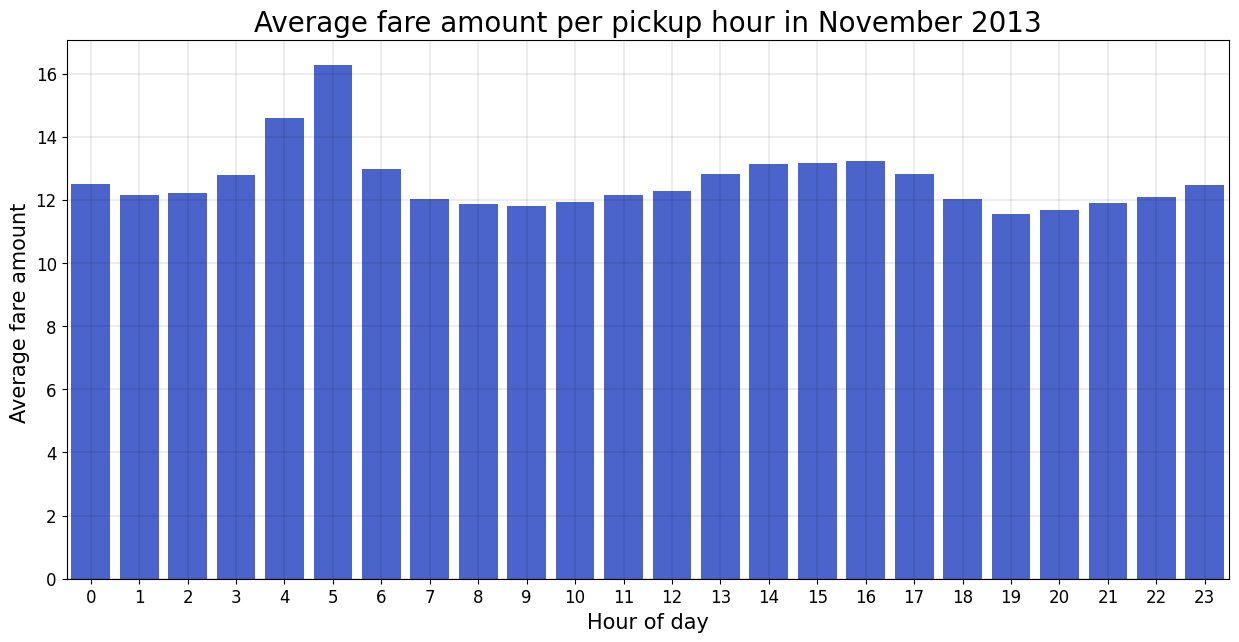

In [7]:
average_fare_per_hour = df.groupby('pickup_hour')['fare_amount'].mean().reset_index().rename(columns={'fare_amount': 'average_fare'})


# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_fare_per_hour,
           x='pickup_hour', y='average_fare',
           color='#3557E2')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average fare amount per pickup hour in November 2013",fontsize=20)
ax.set_xlabel("Hour of day",fontsize=15)
ax.set_ylabel("Average fare amount ",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.grid(True, color='black', linewidth=.1)

plt.show()

### Investigate spike at 4 and 5am

In [14]:
round_to = 2
df['rounded_lat'] = df['pickup_latitude'].round(round_to)
df['rounded_long'] = df['pickup_longitude'].round(round_to)

# lat and longs of jfk
rounded_lat_jfk = [40.64, 40.65]
rounded_long_jfk = [-73.79, -73.78]

# def get_jfk_ind(lat, long):
#     output = 'Not JFK'
#     if lat in rounded_lat_jfk:
#         if long in rounded_long_jfk:
#             output='JFK'
#     return output
# df['jfk_ind'] = df.apply(lambda x: get_jfk_ind(x.rounded_lat, x.rounded_long), axis=1)

df

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,6.0,1.0,15,25,40.75,-73.98
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,5.5,3.0,15,25,40.76,-73.98
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,15.0,2.0,9,25,40.76,-73.98
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,14.0,2.9,6,25,40.74,-73.98
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,12.0,2.0,10,25,40.78,-73.95
...,...,...,...,...,...,...,...,...,...,...
14034045,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,-73.949677,40.776268,52.0,5.0,4,25,40.78,-73.95
14034046,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,-73.975464,40.755527,6.0,2.0,8,25,40.76,-73.98
14034047,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,-74.003677,40.748505,13.0,2.7,14,25,40.75,-74.00
14034048,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,-73.974876,40.782822,7.5,1.7,4,25,40.78,-73.97


In [38]:
avg_fare_by_location = df.groupby(['rounded_lat', 'rounded_long'])['fare_amount'].agg(['mean', 'median', 'count']).reset_index().rename(columns={'mean': 'mean_fare',
                                                                                                                                                 'median': 'median_fare',
                                                                                                                                               'count': 'n_trips'})

avg_fare_by_location = avg_fare_by_location.loc[avg_fare_by_location['n_trips'] > 1000]

avg_fare_by_location.sort_values(by='median_fare', ascending=False).head(10).round(2)

,rounded_lat,rounded_long,mean_fare,median_fare,n_trips
252,40.64,-73.79,46.53,52.0,40155
253,40.64,-73.78,45.21,52.0,53809
291,40.65,-73.80,50.31,52.0,2012
292,40.65,-73.79,46.30,52.0,44723
293,40.65,-73.78,46.35,52.0,64697
379,40.67,-73.80,47.81,52.0,1353
829,40.77,-73.86,31.73,32.0,90071
826,40.77,-73.89,29.47,30.0,16447
828,40.77,-73.87,30.08,30.0,181267
827,40.77,-73.88,30.27,29.5,6603


In [23]:
avg_fare_by_location.sort_values(by='median_fare', ascending=False).head(10)['']

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long,jfk_ind


In [47]:
df['jfk_ind'] = 'N'

df.loc[(df['rounded_lat'].isin([40.64, 40.65, 40.67])) & (df['rounded_long'].isin([-73.80, -73.79, -73.78])), 'jfk_ind'] = 'Y'
# = 'Y'

df

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long,jfk_ind
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,6.0,1.0,15,25,40.75,-73.98,N
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,5.5,3.0,15,25,40.76,-73.98,N
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,15.0,2.0,9,25,40.76,-73.98,N
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,14.0,2.9,6,25,40.74,-73.98,N
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,12.0,2.0,10,25,40.78,-73.95,N
...,...,...,...,...,...,...,...,...,...,...,...
14034045,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,-73.949677,40.776268,52.0,5.0,4,25,40.78,-73.95,N
14034046,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,-73.975464,40.755527,6.0,2.0,8,25,40.76,-73.98,N
14034047,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,-74.003677,40.748505,13.0,2.7,14,25,40.75,-74.00,N
14034048,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,-73.974876,40.782822,7.5,1.7,4,25,40.78,-73.97,N


In [48]:
df.loc[(df['rounded_lat'] == 40.65) & (df['rounded_long'] == -73.80)]

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long,jfk_ind
2617,96604831F40C653BD1556A690291F6E6,EAFD2A3D3A5EEC67493E50EA3E5DBF2D,-73.804977,40.650551,52.0,11.47,21,7,40.65,-73.8,Y
6419,89576B6258E068FCF5E9295EBF50E13A,D41854B53B6D6F2A901BA21DE2136A67,-73.803261,40.648464,52.0,11.47,22,7,40.65,-73.8,Y
7311,DF8FEB2A1245C464DD6265C0E64D2649,874334CB41FE592F24338981B2E4C93E,-73.798882,40.645237,52.0,0.00,22,7,40.65,-73.8,Y
12027,5F817657D191B25C0CB54DE8745EEBB1,1794CB1FC31B4A6B34A9B2AD9B11DDB5,-73.802597,40.647800,52.0,0.00,20,4,40.65,-73.8,Y
19550,ADBB77F1351F039E25EB9814B3C8D56A,E5F2BCDFACBFBDDDA8460113952FB4A6,-73.800301,40.645836,52.0,7.00,20,4,40.65,-73.8,Y
...,...,...,...,...,...,...,...,...,...,...,...
13950256,6C311C789E0DE0ABA7C2648A5C2644DD,AEF88B80E43BCF2C08C344F03F813787,-73.802940,40.648129,52.0,0.00,19,25,40.65,-73.8,Y
13975769,4249B897FF892571FEFFAB2BCE293565,DB73281EFD4E7A28FC3C706D84F898A5,-73.801163,40.646427,52.0,0.00,11,25,40.65,-73.8,Y
13978444,2C062461E5CCEEC52CC673DE0A1194A4,BF157428929790797710C2896924914E,-73.804527,40.649994,52.0,0.00,22,27,40.65,-73.8,Y
13988345,45206A64B0D6B641223B04DA3926EB33,3506E1D0204CF616C91AC1D71858E091,-73.802254,40.647457,52.0,14.33,22,26,40.65,-73.8,Y


In [96]:
counts_per_pickup_hour = df[['pickup_hour']].value_counts().reset_index().rename(columns={'count': 'count_trips'})
counts_per_pickup_hour.head()

,pickup_hour,count_trips
0,19,873634
1,20,832367
2,18,826614
3,21,818562
4,22,793606


In [105]:
counts_per_jfk_ind_pickup_hour = df[['jfk_ind', 'pickup_hour']].value_counts().reset_index().rename(columns={'count': 'count_per_jfk_ind'})
counts_per_jfk_ind_pickup_hour.head()

,jfk_ind,pickup_hour,count_per_jfk_ind
0,N,19,860646
1,N,20,818918
2,N,18,813624
3,N,21,804270
4,N,22,782246


In [100]:
merged_jfk_and_total = pd.merge(left=counts_per_jfk_ind_pickup_hour, 
                                right=counts_per_pickup_hour, 
                                on='pickup_hour', 
                                how='left').sort_values(by='pickup_hour').reset_index(drop=True)

merged_jfk_and_total['proportion_jfk_pickup'] = merged_jfk_and_total['count_per_jfk_ind'] / merged_jfk_and_total['count_trips']

merged_jfk_and_total.head(12)

,jfk_ind,pickup_hour,count_per_jfk_ind,count_trips,proportion_jfk_pickup
0,N,0,555080,563073,0.985805
1,Y,0,7993,563073,0.014195
2,Y,1,2104,445510,0.004723
3,N,1,443406,445510,0.995277
4,N,2,321634,321949,0.999022
5,Y,2,315,321949,0.000978
6,Y,3,231,234694,0.000984
7,N,3,234463,234694,0.999016
8,N,4,169629,170678,0.993854
9,Y,4,1049,170678,0.006146


In [104]:
merged_jfk_and_total[merged_jfk_and_total['jfk_ind']=='Y'].sort_values(by='proportion_jfk_pickup', ascending=False)

,jfk_ind,pickup_hour,count_per_jfk_ind,count_trips,proportion_jfk_pickup
10,Y,5,6166,144863,0.042564
33,Y,16,15550,543796,0.028595
13,Y,6,7402,290124,0.025513
30,Y,15,15882,667727,0.023785
34,Y,17,14396,667110,0.021580
14,Y,7,9816,502581,0.019531
28,Y,14,13673,708978,0.019286
42,Y,21,14292,818562,0.017460
26,Y,13,11578,690170,0.016776
41,Y,20,13449,832367,0.016158


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

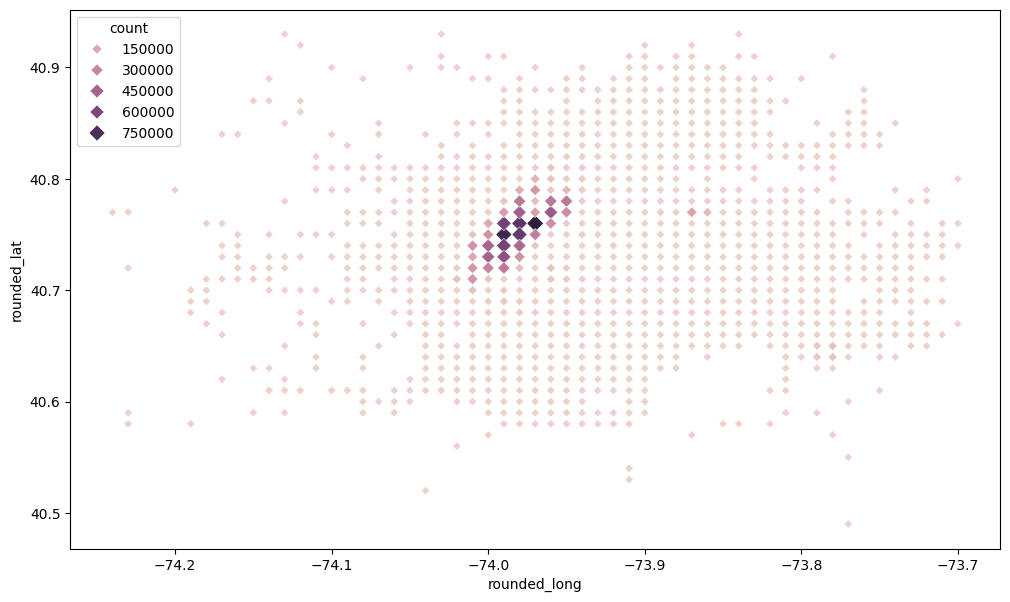

In [96]:


fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=rounded_areas_trips.head(1000),
                hue="count",
                size='count',
               marker='D')

In [75]:
df[df['pickup_hour']==5]

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long
8,8F160024B5E4CE5B7859AE20A4CC26D5,4A1768BADB3B7E83665104410B54A32C,-73.971558,40.794548,14.5,1.0,5,25,40.79,-73.97
106,6CA28FC493307AE347CDF4A4C49A9A96,443ED4A8D53B8CD57E81EE8C9662DB74,-73.957603,40.766090,8.5,3.0,5,25,40.77,-73.96
109,2280C8996D940FE5B586E8FF96F91A0B,8686346D3AFBBC22607B20A036FE61B7,-73.991379,40.759274,4.0,1.0,5,25,40.76,-73.99
3632,7896788B80BC3AD1CC9A188414181C92,8E3865D72C7AEDFDD9F3E12D71FF0495,-73.999107,40.726421,7.5,1.0,5,26,40.73,-74.00
20217,2F15B39D5CC3C332688612724EF80F01,B26A6CD540466B95CCFB7504994EDDDE,-73.985664,40.722202,5.5,1.0,5,30,40.72,-73.99
...,...,...,...,...,...,...,...,...,...,...
14034004,BDFD66ABE176B1096CF7DC8B2BFE9F8C,E33A00F11E9EFC990852BE47CFE6AFB9,-73.993645,40.742592,4.5,0.5,5,25,40.74,-73.99
14034014,F696855822217C42E8872CD817C0EAD8,EF1E45065AC7DAA4C0938ABAF99ACB89,-74.003906,40.725658,4.5,1.0,5,25,40.73,-74.00
14034018,C2A40A5B0F1B26BF17FD07F91CD6176C,A25BE051A63586CBE82D0DA50F2BCDAB,-73.975311,40.777290,30.5,7.0,5,25,40.78,-73.98
14034020,1927FA75767B8BF80452FE39FC8A1F44,622FE4D87B4E4863AE488E33D78A0118,-73.974022,40.788952,9.5,1.0,5,25,40.79,-73.97


In [76]:
df[df['pickup_hour']==5][['rounded_lat', 'rounded_long']].value_counts().reset_index()

,rounded_lat,rounded_long,count
0,40.76,-73.99,10360
1,40.75,-73.99,9323
2,40.73,-73.99,5695
3,40.74,-74.00,5413
4,40.76,-73.97,5207
...,...,...,...
458,40.89,-73.86,1
459,40.89,-73.84,1
460,40.58,-73.99,1
461,40.90,-73.86,1


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

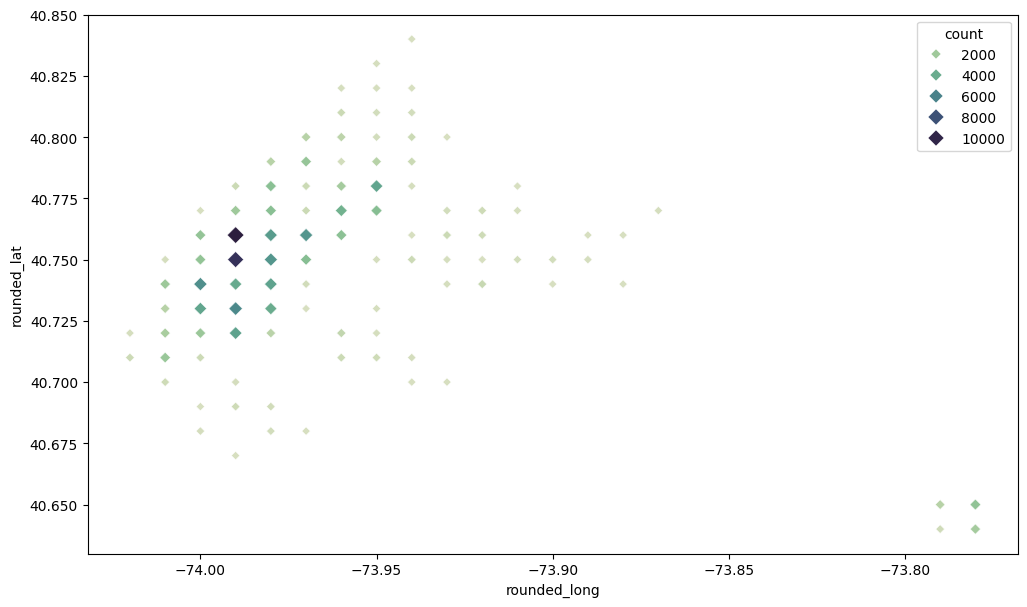

In [90]:
data_for_plot = df[df['pickup_hour']==5][['rounded_lat', 'rounded_long']].value_counts().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=data_for_plot.head(100),
                hue="count",
                size='count',
               marker='D',
               palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

In [81]:
rounded_lat_jfk = [40.64, 40.65]
rounded_long_jfk = [-73.79, -73.78]

data_for_plot.loc[data_for_plot['rounded_long'] > -73.8]

,rounded_lat,rounded_long,count
19,40.65,-73.78,2512
28,40.64,-73.78,1839
30,40.65,-73.79,1289
55,40.64,-73.79,383
146,40.66,-73.79,27
206,40.71,-73.79,8
231,40.73,-73.75,6
239,40.67,-73.79,6
292,40.71,-73.78,2
293,40.71,-73.73,2


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

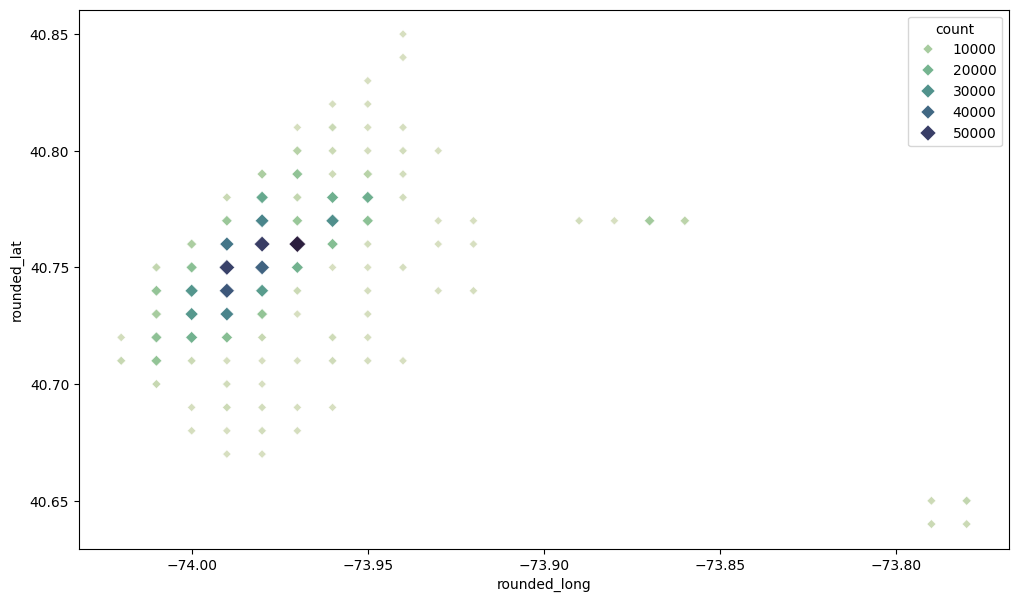

In [91]:
data_for_plot = df[df['pickup_hour']==19][['rounded_lat', 'rounded_long']].value_counts().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=data_for_plot.head(100),
                hue="count",
                size='count',
               marker='D',
               palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

In [97]:
df

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,6.0,1.0,15,25,40.75,-73.98
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,5.5,3.0,15,25,40.76,-73.98
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,15.0,2.0,9,25,40.76,-73.98
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,14.0,2.9,6,25,40.74,-73.98
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,12.0,2.0,10,25,40.78,-73.95
...,...,...,...,...,...,...,...,...,...,...
14034045,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,-73.949677,40.776268,52.0,5.0,4,25,40.78,-73.95
14034046,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,-73.975464,40.755527,6.0,2.0,8,25,40.76,-73.98
14034047,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,-74.003677,40.748505,13.0,2.7,14,25,40.75,-74.00
14034048,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,-73.974876,40.782822,7.5,1.7,4,25,40.78,-73.97
